In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data.csv')
data = data.drop(columns=['Unnamed: 0'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data.columns

Index(['name', 'brand', '2G', '3G', '4G', '5G', 'Announced', 'Status',
       'Weight', 'Length', 'Width', 'Diameter', 'SIM', 'Display Type',
       'Display Size', 'ppi', 'body ratio', 'OS', 'battery_capacity', 'Price',
       'CPU', 'ratio', 'pixel', 'WLAN', 'Colors', 'Sensors', 'Bluetooth',
       'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset', 'Network', 'Internal',
       'Card slot', 'RAM', 'Storage'],
      dtype='object')

In [4]:
data['OS'] = data['OS'].str.extract(r'^(\w+)')
data['OS'].unique()

array(['Android', 'KaiOS', 'Windows', 'Firefox', 'OS', 'iOS', 'iPadOS',
       'Phone', 'Mobile', 'HarmonyOS', 'EMUI', 'platform', 'Belle',
       'Anna', 'Symbian', 'FP1', 'MeeGo', 'Linux', 'Tizen'], dtype=object)

In [5]:
data['OS'] = data['OS'].replace({'iPadOS': 'iOS'})
data['OS'] = data['OS'].apply(lambda x: 'Others' if x not in ['Android', 'iOS'] else x)

In [6]:
data['OS'].value_counts()

OS
Android    2449
Others      137
iOS          65
Name: count, dtype: int64

#### name

In [7]:
data = data.drop(columns='name')

 It would be best to drop 'name' as it have many unique values and doesn't contribute to the data

#### brand

In [8]:
data.groupby('OS')['brand'].value_counts()

OS       brand  
Android  samsung    521
         xiaomi     285
         huawei     250
         lg         226
         zte        202
         htc        187
         lenovo     174
         blu        146
         sony       122
         asus       113
         alcatel    103
         nokia       82
         infinix     38
Others   nokia       67
         huawei      27
         htc         17
         samsung     11
         alcatel      8
         zte          4
         lg           2
         blu          1
iOS      apple       65
Name: count, dtype: int64

| Brand   | Intersecting OS Categories |
|---------|----------------------------|
| Nokia   | Android, Others            |
| Huawei  | Android, Others            |
| HTC     | Android, Others            |
| Samsung | Android, Others            |
| Alcatel | Android, Others            |
| ZTE     | Android, Others            |
| LG      | Android, Others            |
| BLU     | Android, Others            |


iOS just includes 'Apple' brand

#### 2G 3G 4G 5G

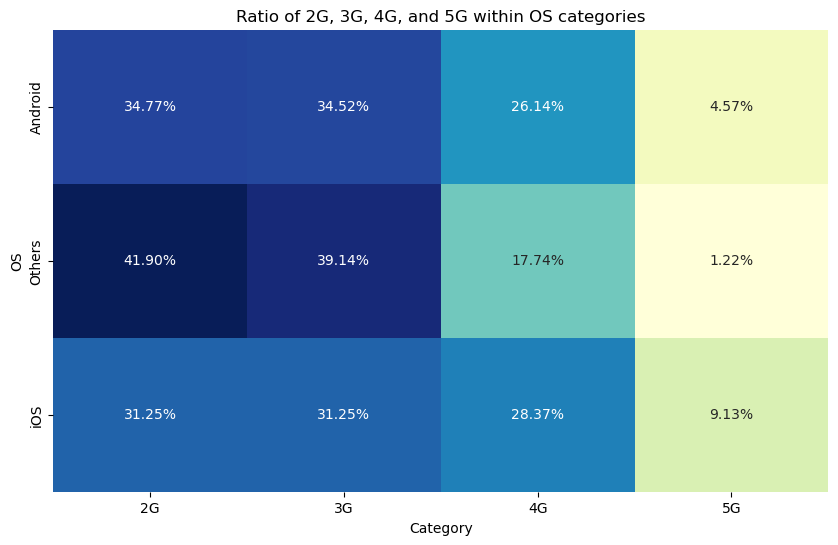

In [9]:
subset = data[['OS', '2G', '3G', '4G', '5G']]

# Group by OS and calculate the ratio
grouped = subset.groupby('OS').apply(lambda x: x.sum() / x.sum().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(grouped, cmap="YlGnBu", annot=True, fmt=".2%", cbar=False)
plt.title('Ratio of 2G, 3G, 4G, and 5G within OS categories')
plt.xlabel('Category')
plt.ylabel('OS')
plt.show()

In [10]:
data = data.drop(columns=['2G', '3G'])

4G and 5G have difference in ratio, I think it would be best to keep the '5G' column

 But there's doubt regarding 4G as it helps with classifying 'Others', but not so helpful when it comes to Android or iOS

#### Announced

In [11]:
data.groupby('OS')['Announced'].value_counts()

OS       Announced
Android  2014.0       282
         2015.0       232
         2020.0       227
         2019.0       199
         2012.0       196
         2016.0       193
         2013.0       191
         2018.0       184
         2021.0       171
         2022.0       160
         2017.0       152
         2011.0       117
         2023.0        94
         2010.0        35
         2024.0        16
Others   2011.0        26
         2010.0        19
         2012.0        19
         2014.0        18
         2013.0        17
         2022.0        11
         2021.0         9
         2023.0         6
         2020.0         3
         2019.0         2
         2016.0         2
         2015.0         2
         2024.0         1
         2018.0         1
         2017.0         1
iOS      2017.0         6
         2019.0         6
         2020.0         6
         2021.0         6
         2022.0         6
         2018.0         5
         2013.0         4
         2016.0    

In [12]:
def calculate_and_plot_ratio(data, group_columns, value_column):
    # calculate the total count
    total_counts = data.groupby(group_columns[0])[value_column].transform('count')
    
    # calculate the ratio
    data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
    
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(data=data, x=value_column, y='Ratio', hue=group_columns[0])
    plt.title(f'Ratio of {value_column} by {group_columns[0]}')
    plt.xlabel(value_column)
    plt.ylabel('Ratio')
    plt.legend(title=group_columns[0])
    plt.show()

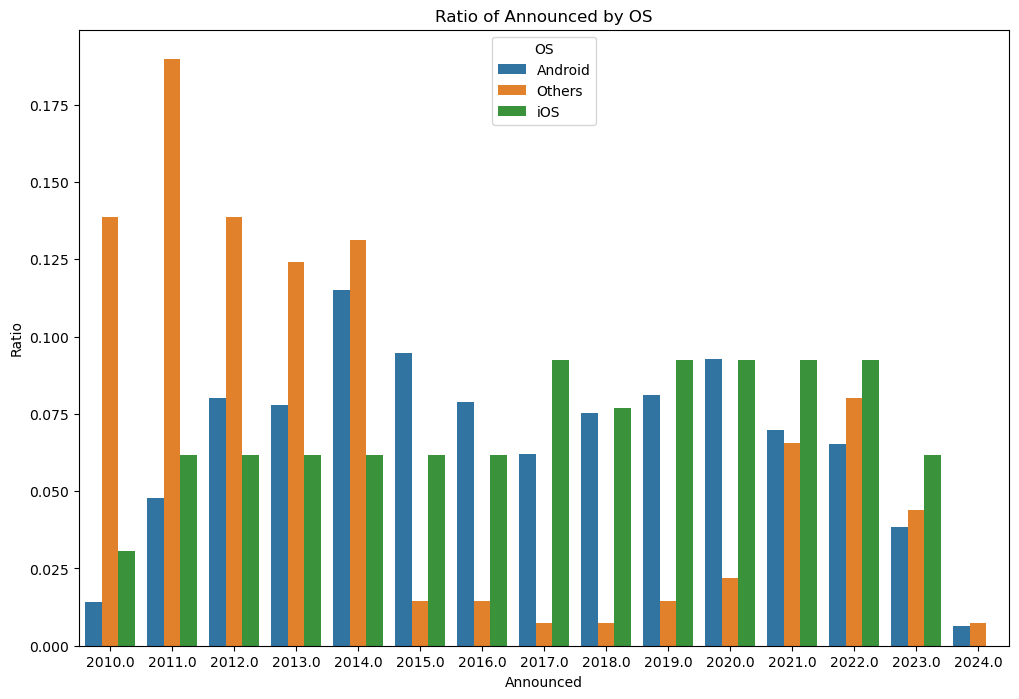

In [13]:
calculate_and_plot_ratio(data, ['OS', 'Announced'], 'Announced')

 Based on the difference between the ratio, I think it would be best to keep the 'Announced' column

#### Status

In [14]:
data.groupby('OS')['Status'].value_counts()

OS       Status      
Android  Discontinued    1251
         Available       1195
         Coming             3
Others   Discontinued     103
         Available         34
iOS      Available         38
         Discontinued      27
Name: count, dtype: int64

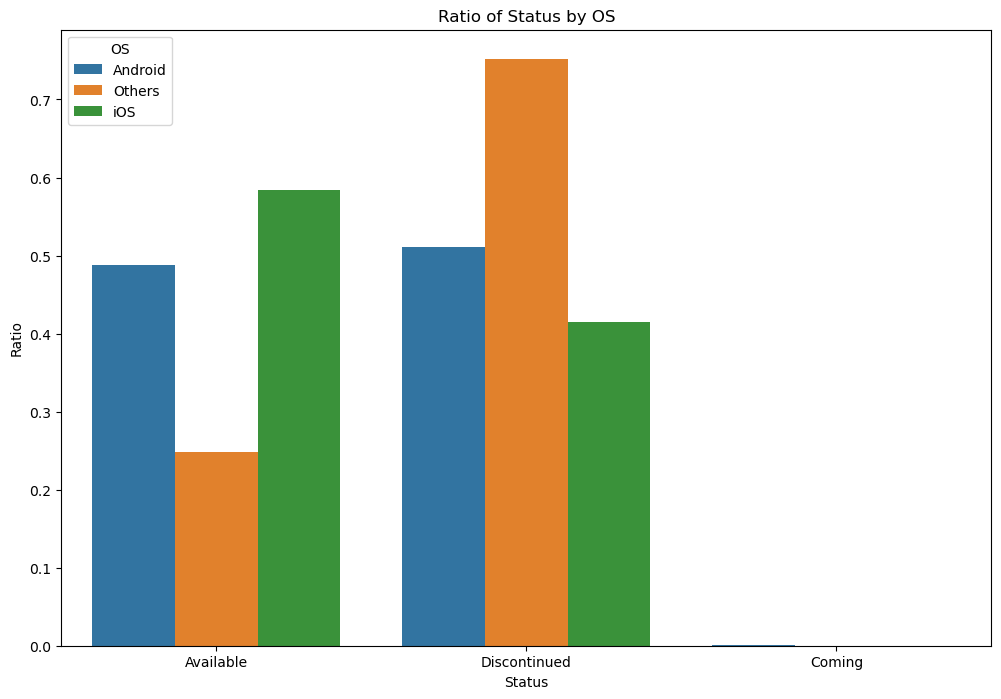

In [15]:
calculate_and_plot_ratio(data, ['OS', 'Status'], 'Status')

 There's doubt regarding keeping 'Status' column

 We can try by keeping or disregarding it in the main model

#### Weight

In [16]:
data.groupby('OS')['Weight'].value_counts()

OS       Weight
Android  150.0     49
         130.0     45
         145.0     45
         160.0     43
         140.0     40
         155.0     40
         170.0     37
         190.0     36
         120.0     35
         180.0     35
         135.0     35
         165.0     35
         168.0     34
         185.0     32
         144.0     31
         192.0     30
         175.0     28
         196.0     28
         169.0     27
         172.0     26
         188.0     26
         178.0     25
         186.0     24
         195.0     23
         149.0     23
         198.0     21
         200.0     21
         181.0     20
         110.0     20
         146.0     19
         148.0     19
         189.0     19
         162.0     18
         143.0     18
         163.0     18
         161.0     18
         202.0     18
         154.0     18
         158.0     17
         147.0     17
         153.0     17
         129.0     17
         156.0     17
         132.0     17
         164.0  

In [17]:
data.describe()

,Announced,Weight,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage,Ratio
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2372.000000,2.651000e+03,2651.000000,2651.000000,2651.000000
mean,2016.577518,190.389325,5.759838,312.312335,71.775556,3385.437948,242.896775,5.847808,1.576779e+06,2.901974,46.621613,0.506018
std,3.656827,97.208564,1.628346,101.907171,11.262514,1627.512406,193.726059,2.372880,1.181280e+06,2.493559,60.823522,0.061808
min,2010.000000,89.300000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062,0.001225
25%,2014.000000,140.100000,4.700000,233.000000,64.650000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000,0.487954
50%,2016.000000,167.000000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000,0.510821
75%,2020.000000,195.000000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000,0.510821
max,2024.000000,950.000000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000,0.751825


In [18]:
def plot_feature_distribution(data, feature):
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='OS', y=feature)
    plt.title(f'Distribution of {feature} by OS')
    plt.xlabel('OS')
    plt.ylabel(feature)
    plt.show()

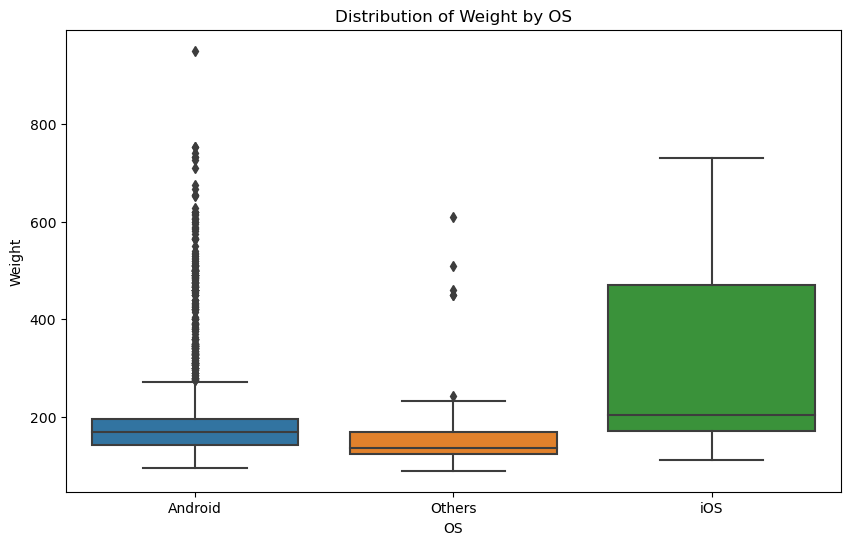

In [19]:
plot_feature_distribution(data, 'Weight')

 I recommend binning this column

In [20]:
bins = [89, 140.1, 167.0, 195.0, 951]
labels = ['Very Light', 'Light', 'Medium', 'Heavy']

data['Weight Cat'] = pd.cut(data['Weight'], bins=bins, labels=labels)

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

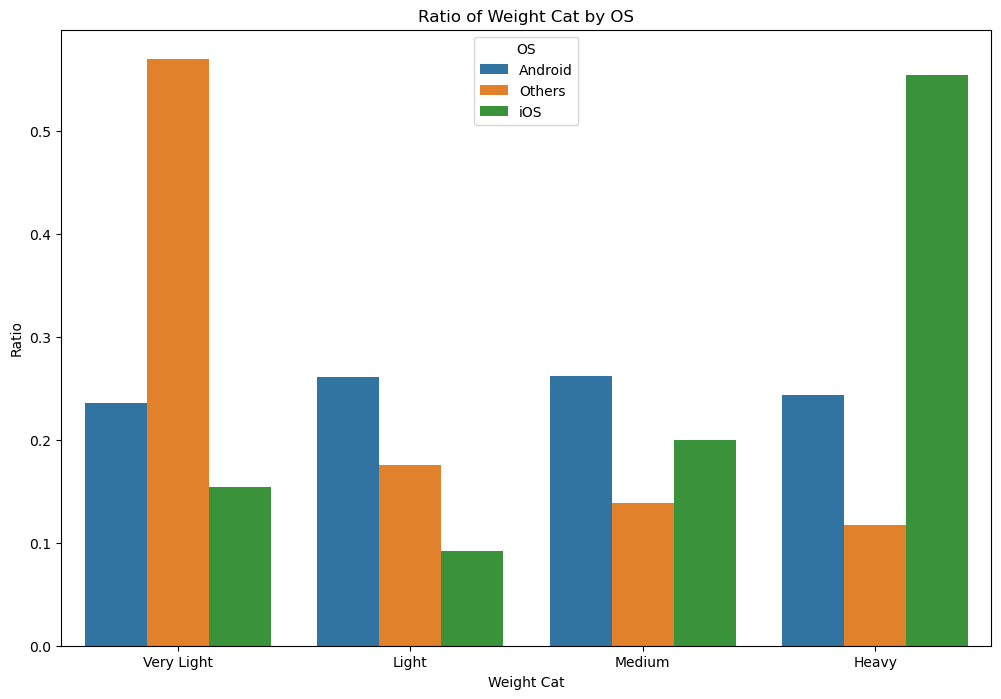

In [21]:
calculate_and_plot_ratio(data, ['OS', 'Weight Cat'], 'Weight Cat')

#### Length, Width, Diameter

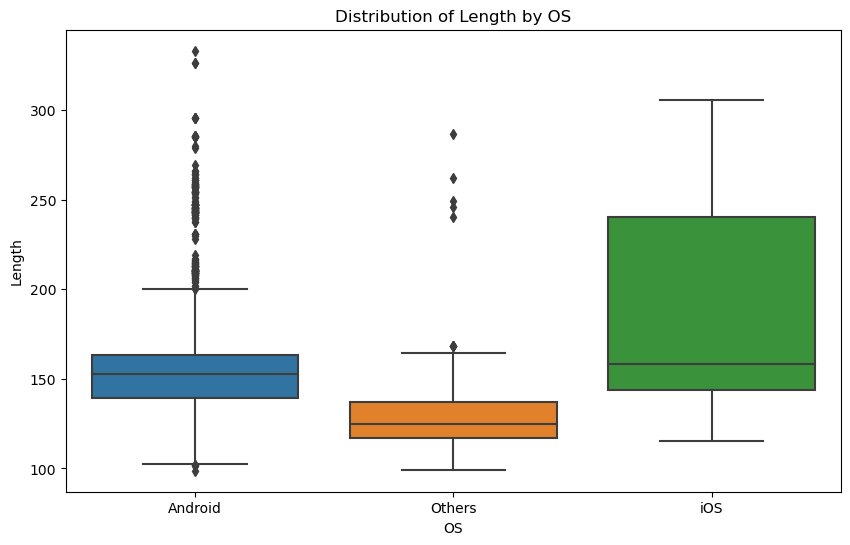

In [22]:
plot_feature_distribution(data, 'Length')

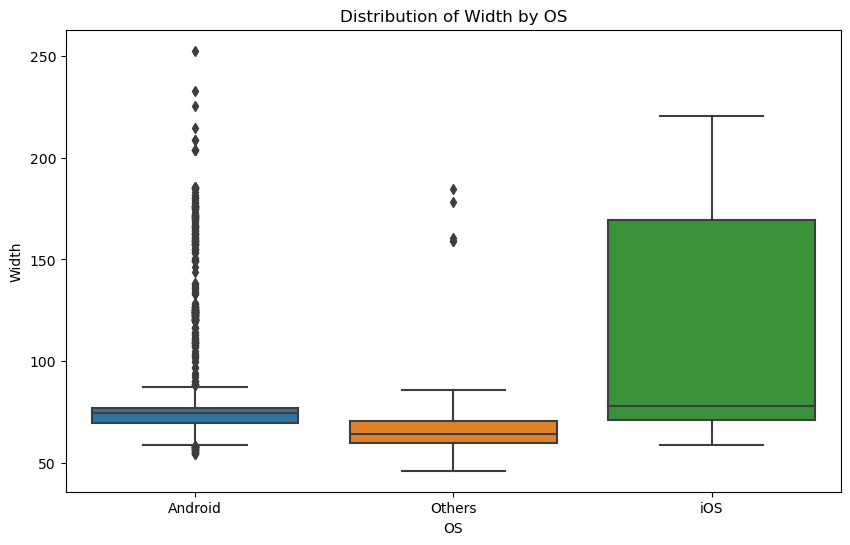

In [23]:
plot_feature_distribution(data, 'Width')

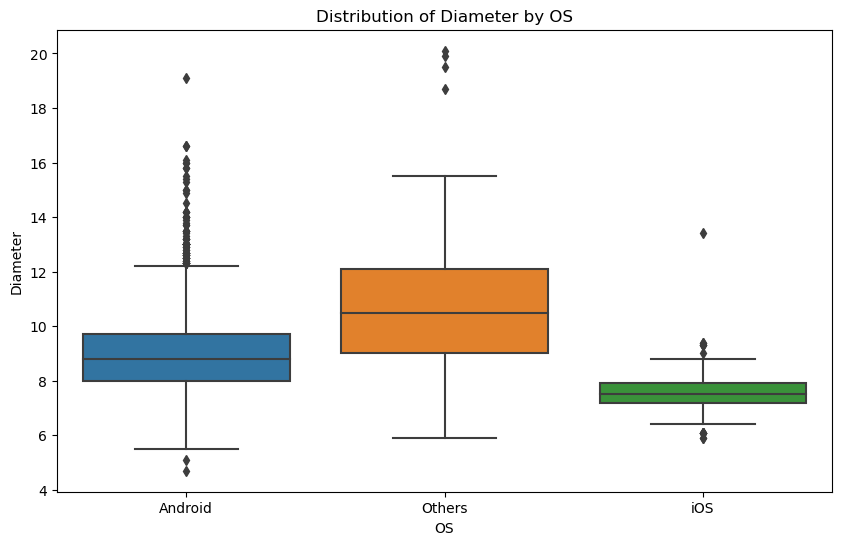

In [24]:
plot_feature_distribution(data, 'Diameter')

 I would recommend binning these columns as 'Android' has a lot of outliars and it might cause errors in the model

In [25]:
data['Size'] = data['Length'] * data['Width'] * data['Diameter']

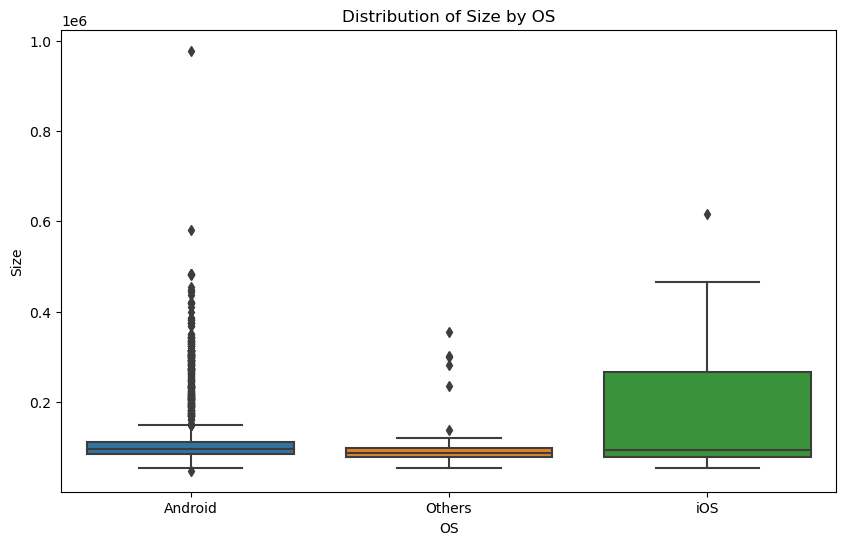

In [26]:
plot_feature_distribution(data, 'Size')

In [27]:
data['Area'] = data['Length'] * data['Width']

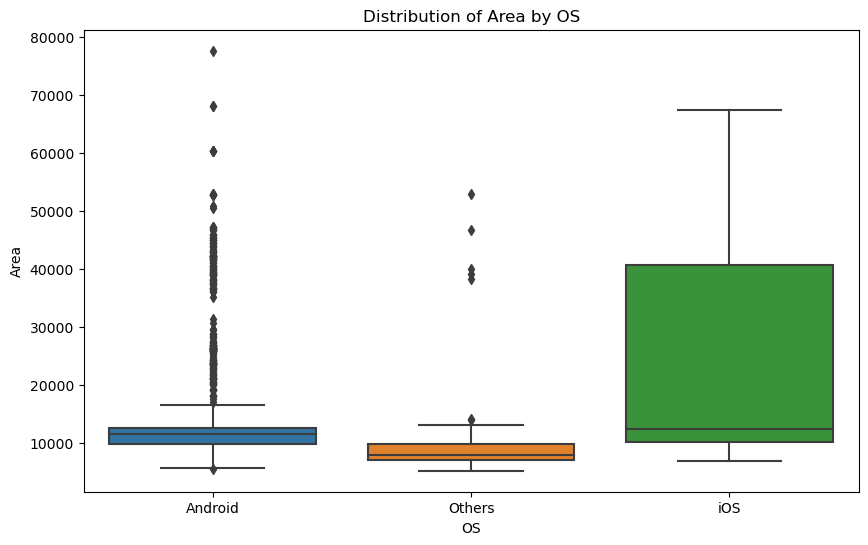

In [28]:
plot_feature_distribution(data, 'Area')

Between 'Size', 'Area' and 'Diameter', 'Diameter' shows more of a clear difference
Especially between iOS and the other two

But before dropping these columns, we need to make sure Diameter is not null

In [29]:
data = data[data['Diameter'].notna()]

In [30]:
data = data.drop(columns=['Length', 'Width', 'Size', 'Area'])

In [31]:
data['Diameter'].describe()

count    2646.000000
mean        9.101209
std         1.641620
min         4.700000
25%         8.000000
50%         8.800000
75%         9.800000
max        20.100000
Name: Diameter, dtype: float64

In [32]:
bins = [0, 8.0, 8.8, 9.8, 170]
labels = ['Small', 'Medium', 'Large', 'Very Large']

data['Diameter Cat'] = pd.cut(data['Diameter'], bins=bins, labels=labels)

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

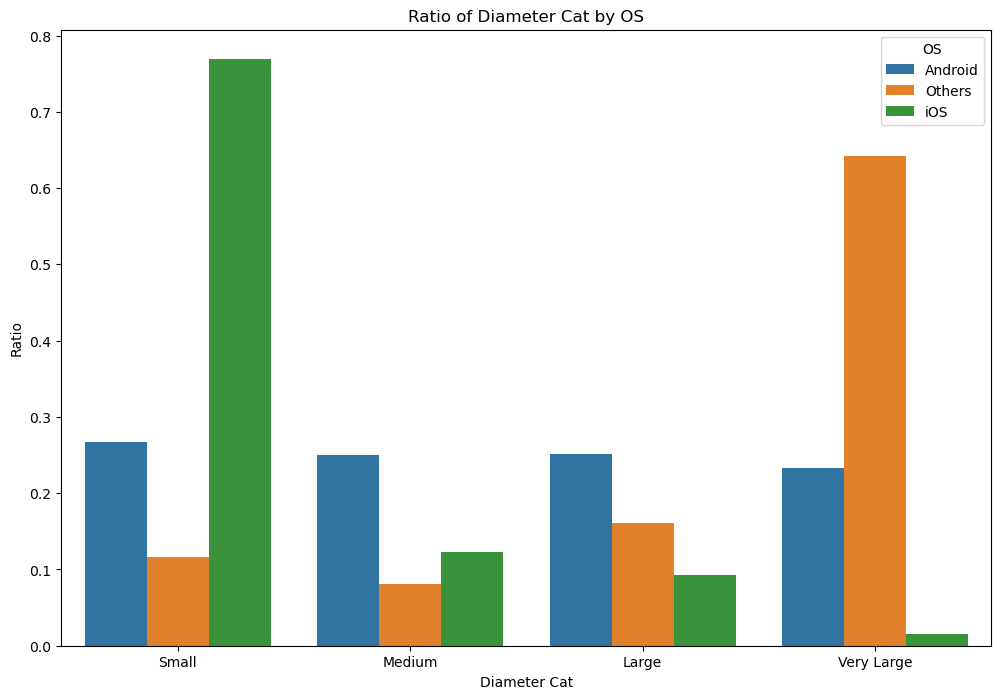

In [33]:
calculate_and_plot_ratio(data, ['OS', 'Diameter Cat'], 'Diameter Cat')

#### SIM

In [34]:
data.groupby('OS')['SIM'].value_counts()

OS       SIM      
Android  Nano-SIM     1377
         Micro-SIM     576
         Mini-SIM      436
         eSIM           55
Others   Micro-SIM      50
         Mini-SIM       46
         Nano-SIM       41
iOS      eSIM           41
         Nano-SIM       16
         Micro-SIM       7
         Mini-SIM        1
Name: count, dtype: int64

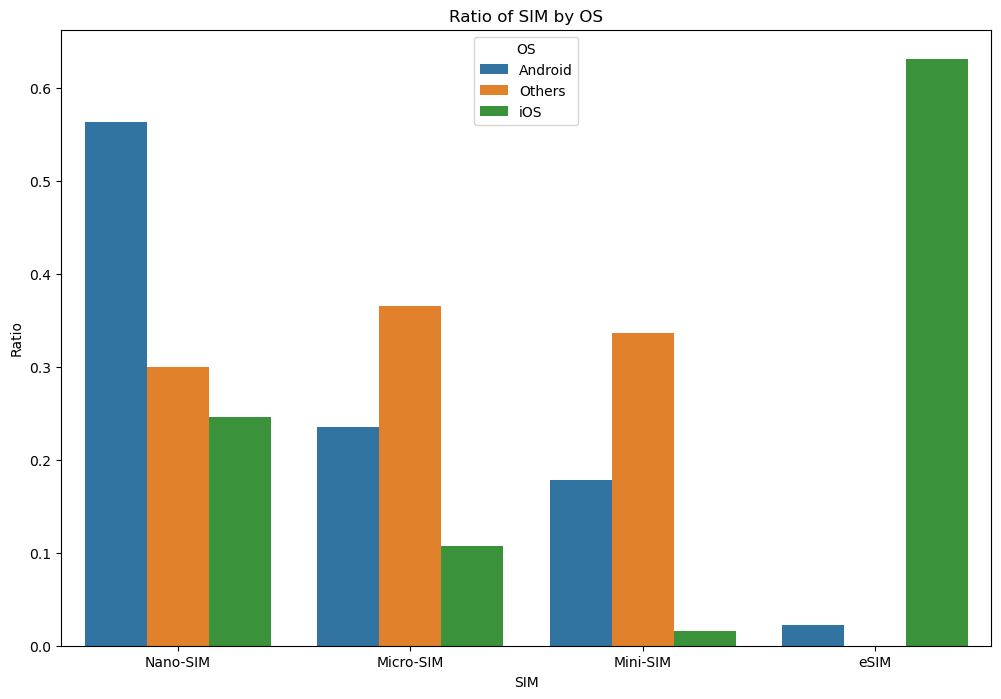

In [35]:
calculate_and_plot_ratio(data, ['OS', 'SIM'], 'SIM')

It's best to keep this column as 'eSIM' is the most used in iOS and is rarely used in other operating systems

Also Nano-SIM is the most used for Android and Micro-SIM is the most used for Others

#### Display Type

In [36]:
data['Display Type'].unique()

array(['TFT LCD', 'IPS LCD', 'TN TFT LCD', 'Super AMOLED', 'TFT',
       'AMOLED', 'TFT, 256K colors',
       'LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 2000 nits (HBM)',
       'Super Retina XDR OLED, HDR10, Dolby Vision, 1000 nits (HBM), 2000 nits (peak)',
       'Liquid Retina XDR mini-LED LCD, 120Hz, HDR10, Dolby Vision, 1000 nits (typ), 1600 nits (peak)',
       'Super Retina XDR OLED, HDR10, Dolby Vision, 800 nits (HBM), 1200 nits (peak)',
       'Retina IPS LCD, 625 nits (typ)',
       'Super Retina XDR OLED, 120Hz, HDR10, Dolby Vision, 1000 nits (HBM), 1200 nits (peak)',
       'Retina IPS LCD, 500 nits (typ)',
       'Super Retina XDR OLED, HDR10, Dolby Vision, 625 nits (HBM), 1200 nits (peak)',
       'IPS LCD, 120Hz, 600 nits (typ)',
       'Liquid Retina IPS LCD, 625 nits (typ)', 'IPS LCD, 120Hz',
       'Super Retina OLED, HDR10, Dolby Vision, 625 nits (HBM)',
       'Liquid Retina IPS LCD, 625 nits (HBM)', 'IPS LCD, 500 nits',
       'LTPO A

In [37]:
data['Display Type'] = data['Display Type'].str.split(',').str[0]

In [38]:
data['Display Type'].unique()

array(['TFT LCD', 'IPS LCD', 'TN TFT LCD', 'Super AMOLED', 'TFT',
       'AMOLED', 'LTPO Super Retina XDR OLED', 'Super Retina XDR OLED',
       'Liquid Retina XDR mini-LED LCD', 'Retina IPS LCD',
       'Liquid Retina IPS LCD', 'Super Retina OLED', 'LTPO AMOLED',
       'Super AMOLED ', 'S-IPS LCD', 'Super IPS+', 'IPS+ LCD',
       'Super IPS+ LCD', 'Super IPS LCD', 'LED-backlit IPS LCD', 'LCD',
       'Super IPS LCD2', 'TFT resistive touchscreen', 'OLED',
       'Super LCD6', 'Super LCD3', 'Super LCD', 'Super LCD5',
       'Super LCD2', 'S-LCD2', 'S-LCD', '3D LCD', '3D S-LCD',
       'AMOLED or SLCD', 'LTPO OLED', 'Foldable OLED', 'IPS-NEO LCD',
       'TDDI IPS LCD', 'TDDI', 'P-OLED', 'Curved P-OLED',
       'True HD-IPS + LCD', 'True IPS+ LCD', 'True Full HD IPS Plus LCD',
       'True HD IPS+', 'True HD-IPS LCD', 'AH IPS LCD',
       'True HD IPS Plus', 'HD-IPS LCD', '3D IPS LCD', 'AH-IPS LCD',
       'TFT  LCD', 'LED-backlit LCD', 'Dual IPS LCD', 'TN',
       'IGZO IPS LCD', 'AMO

In [39]:
data.groupby('OS')['Display Type'].value_counts()

OS       Display Type                  
Android  IPS LCD                           1188
         TFT                                314
         Super AMOLED                       288
         AMOLED                             154
         OLED                                85
         PLS LCD                             68
         TFT LCD                             34
         Super AMOLED Plus                   25
         Dynamic AMOLED 2X                   24
         Super LCD3                          21
         LCD                                 20
         Super LCD2                          20
         S-LCD                               19
         Super LCD                           16
         LED-backlit LCD                     15
         S-IPS LCD                           10
         LED-backlit IPS LCD                  9
         True HD-IPS + LCD                    9
         P-OLED                               9
         Super IPS+ LCD                       8


In [40]:
def categorize_display_type(display_type):
    if 'Retina' in display_type:
        return 'Retina'
    elif 'LCD' in display_type:
        return 'LCD'
    elif 'AMOLED' in display_type:
        return 'AMOLED'
    elif 'OLED' in display_type:
        return 'OLED'
    elif 'TFT' in display_type:
        return 'TFT'
    else:
        return 'Others'

In [41]:
data['Display Type'] = data['Display Type'].apply(categorize_display_type)

In [42]:
data.groupby('OS')['Display Type'].value_counts()

OS       Display Type
Android  LCD             1505
         AMOLED           513
         TFT              319
         OLED              97
         Others            10
Others   LCD               47
         TFT               41
         AMOLED            32
         OLED              17
iOS      LCD               33
         Retina            32
Name: count, dtype: int64

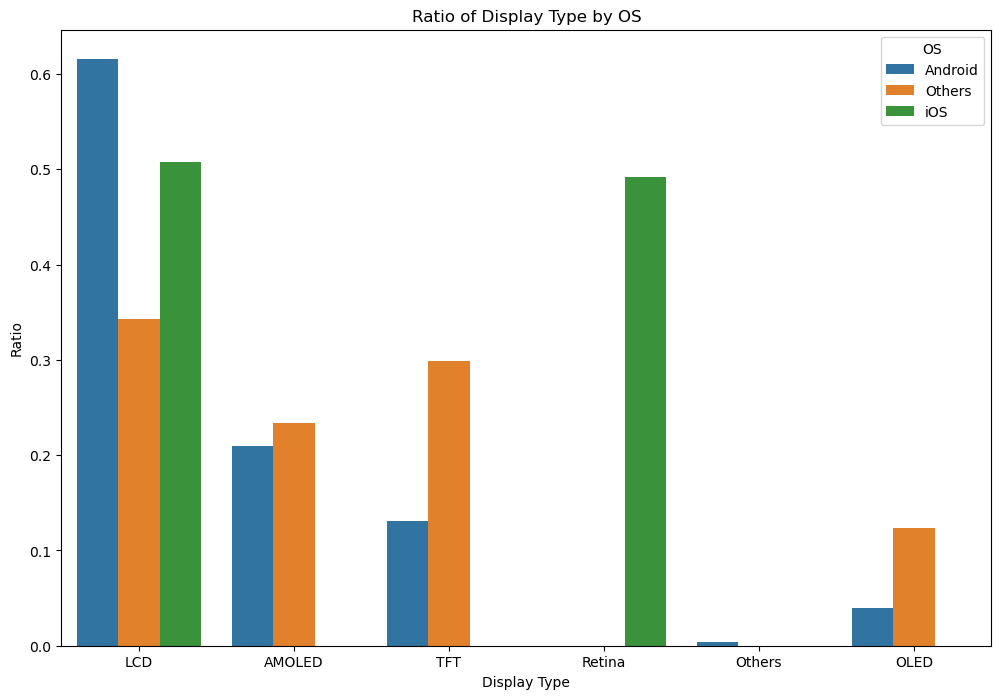

In [43]:
calculate_and_plot_ratio(data, ['OS', 'Display Type'], 'Display Type')

#### Display Size

In [44]:
data.groupby('OS')['Display Size'].value_counts()

OS       Display Size
Android  5.00            285
         5.50            209
         4.00            132
         6.67            130
         4.50            119
         6.50             89
         6.00             86
         4.30             81
         5.70             75
         5.20             67
         4.70             60
         3.50             57
         7.00             57
         6.60             53
         8.00             52
         10.10            49
         6.40             42
         6.70             37
         6.53             34
         6.30             33
         6.52             33
         3.20             32
         6.20             30
         6.39             30
         6.80             30
         6.10             27
         5.45             26
         5.30             26
         5.10             21
         6.26             20
         5.99             16
         3.70             16
         6.55             15
         4.80        

In [45]:
bins = [0, 4, 5, 6, 7, 8, 9, 10, 15]

labels = ['0-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-15']

data['Display Size Cat'] = pd.cut(data['Display Size'], bins=bins, labels=labels, right=False)

In [46]:
data.groupby('OS')['Display Size Cat'].value_counts()

OS       Display Size Cat
Android  6-7                 831
         5-6                 776
         4-5                 436
         0-4                 152
         10-15               104
         8-9                  67
         7-8                  65
         9-10                 13
Others   0-4                  55
         4-5                  46
         6-7                  23
         5-6                   8
         10-15                 5
         9-10                  0
         8-9                   0
         7-8                   0
iOS      6-7                  18
         4-5                  10
         9-10                 10
         10-15                10
         5-6                   9
         7-8                   5
         0-4                   3
         8-9                   0
Name: count, dtype: int64

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

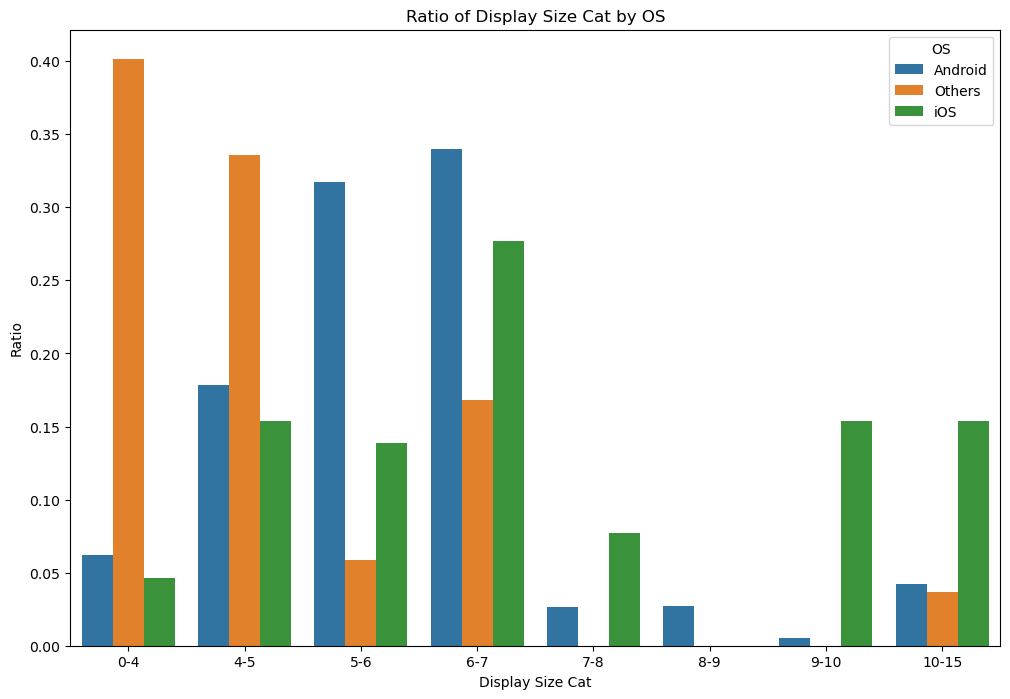

In [47]:
calculate_and_plot_ratio(data, ['OS', 'Display Size Cat'], 'Display Size Cat')

#### ppi

In [48]:
data.groupby('OS')['ppi'].value_counts()

OS       ppi  
Android  294.0    135
         395.0    121
         233.0    119
         401.0     90
         267.0     88
         403.0     73
         441.0     67
         269.0     65
         270.0     59
         245.0     53
         165.0     52
         218.0     47
         424.0     45
         282.0     43
         217.0     43
         196.0     39
         170.0     37
         400.0     34
         402.0     33
         312.0     32
         224.0     32
         295.0     30
         189.0     29
         393.0     29
         409.0     29
         256.0     28
         220.0     27
         268.0     24
         386.0     22
         326.0     21
         405.0     21
         180.0     21
         149.0     20
         207.0     17
         367.0     17
         234.0     17
         293.0     17
         283.0     17
         266.0     16
         432.0     16
         216.0     16
         252.0     15
         534.0     14
         342.0     14
         515.0   

In [49]:
bins = [0, 200, 250, 300, 400, 500, 900]

labels = ['0-200', '201-250', '251-300', '301-400', '401-500', '<=500']

data['ppi Cat'] = pd.cut(data['ppi'], bins=bins, labels=labels)

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

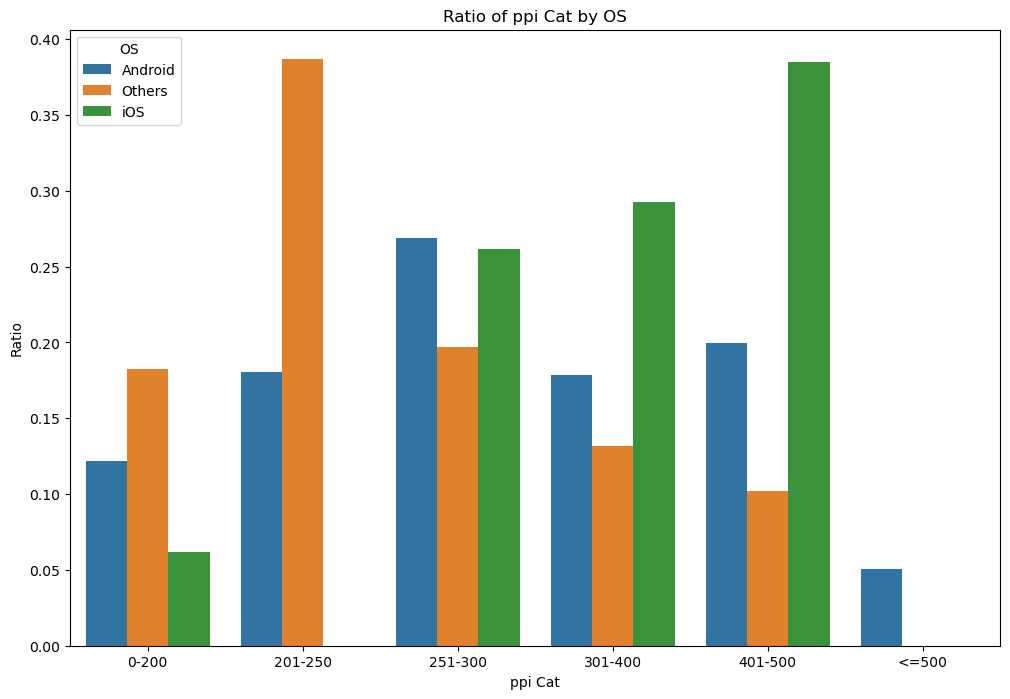

In [50]:
calculate_and_plot_ratio(data, ['OS', 'ppi Cat'], 'ppi Cat')

#### body ratio

In [51]:
data.groupby('OS')['body ratio'].value_counts()

OS       body ratio
Android  83.6          26
         71.7          22
         66.7          20
         81.0          20
         84.2          20
         71.4          19
         69.6          18
         81.6          18
         66.2          18
         84.6          17
         72.7          16
         70.9          16
         69.3          15
         81.9          15
         68.4          15
         84.5          15
         83.4          14
         81.8          14
         61.3          14
         70.6          14
         69.4          14
         84.3          14
         72.3          14
         83.5          14
         67.2          14
         68.6          13
         71.5          13
         64.7          13
         70.8          13
         86.1          13
         86.0          13
         66.6          13
         82.5          13
         83.2          13
         81.7          13
         66.0          13
         84.8          13
         67.6     

In [52]:
bins = [25, 64.65, 71.4, 95]
labels = ['Low', 'Medium', 'High']

data['body ratio Cat'] = pd.cut(data['body ratio'], bins=bins, labels=labels)

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

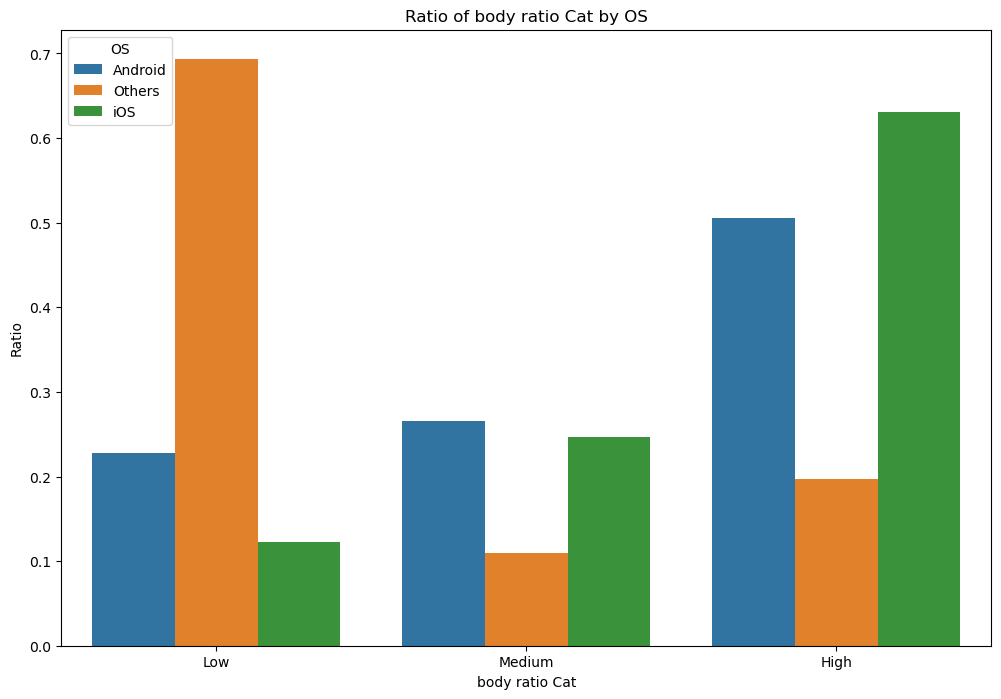

In [53]:
calculate_and_plot_ratio(data, ['OS', 'body ratio Cat'], 'body ratio Cat')

#### battery_capacity

In [54]:
data.groupby('OS')['battery_capacity'].value_counts()

OS       battery_capacity
Android  5000.0              274
         4000.0              214
         3000.0              201
         2000.0              109
         1500.0               93
         4500.0               80
         2600.0               63
         2100.0               58
         2500.0               47
         1800.0               46
         3300.0               45
         6000.0               43
         2300.0               42
         3500.0               41
         1300.0               35
         2800.0               35
         1400.0               29
         2200.0               28
         4100.0               27
         3200.0               27
         5100.0               25
         1650.0               25
         1700.0               23
         4200.0               21
         3400.0               19
         1900.0               19
         3100.0               18
         2150.0               17
         2700.0               17
         1200.0  

In [55]:
data.describe()

,Announced,Weight,Diameter,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage,Ratio
count,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2367.000000,2.646000e+03,2646.000000,2646.000000,2646.000000
mean,2016.579365,190.298980,9.101209,5.759762,312.360544,71.784769,3386.117158,242.868235,5.851711,1.577013e+06,2.903678,46.641684,0.389090
std,3.658113,96.852551,1.641620,1.625784,101.850478,11.266017,1625.541033,193.878053,2.371013,1.180902e+06,2.495000,60.844840,0.144892
min,2010.000000,89.300000,4.700000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062,0.109489
25%,2014.000000,140.150000,8.000000,4.700000,233.000000,64.700000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000,0.265957
50%,2016.000000,167.000000,8.800000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000,0.506137
75%,2020.000000,195.000000,9.800000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000,0.506137
max,2024.000000,950.000000,20.100000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000,0.693431


In [56]:
bins = [0, 3000, 6000, float('inf')]
labels = ['Low', 'Medium', 'High']

data['battery_capacity Cat'] = pd.cut(data['battery_capacity'], bins=bins, labels=labels, right=False)

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

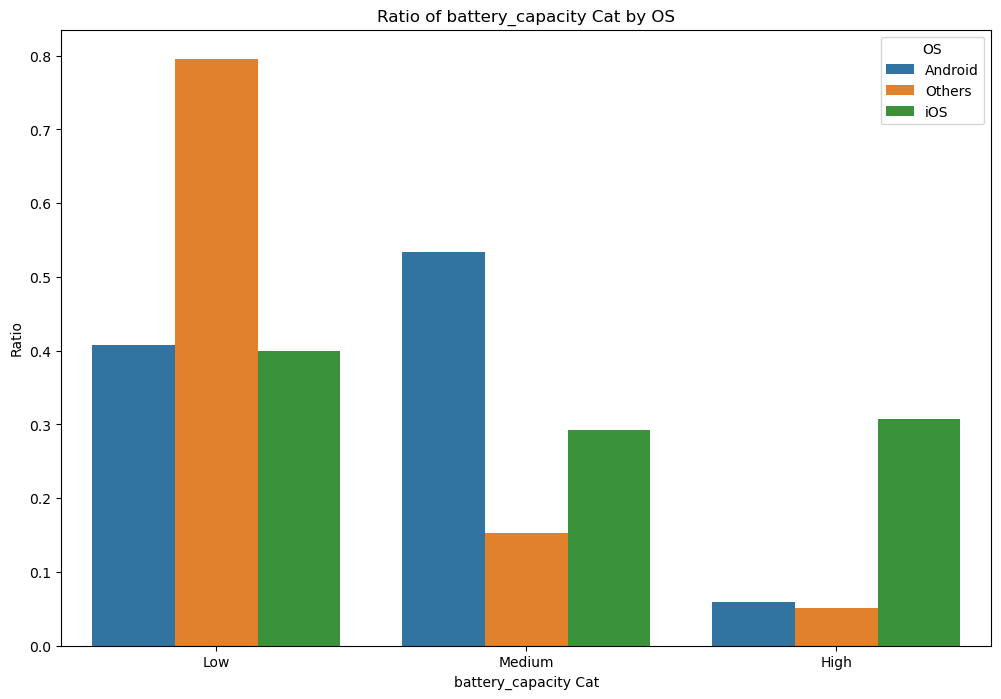

In [57]:
calculate_and_plot_ratio(data, ['OS', 'battery_capacity Cat'], 'battery_capacity Cat')

#### Price

In [58]:
data['Price'].describe()

count    2646.000000
mean      242.868235
std       193.878053
min        20.000000
25%       130.000000
50%       190.000000
75%       290.000000
max      2000.000000
Name: Price, dtype: float64

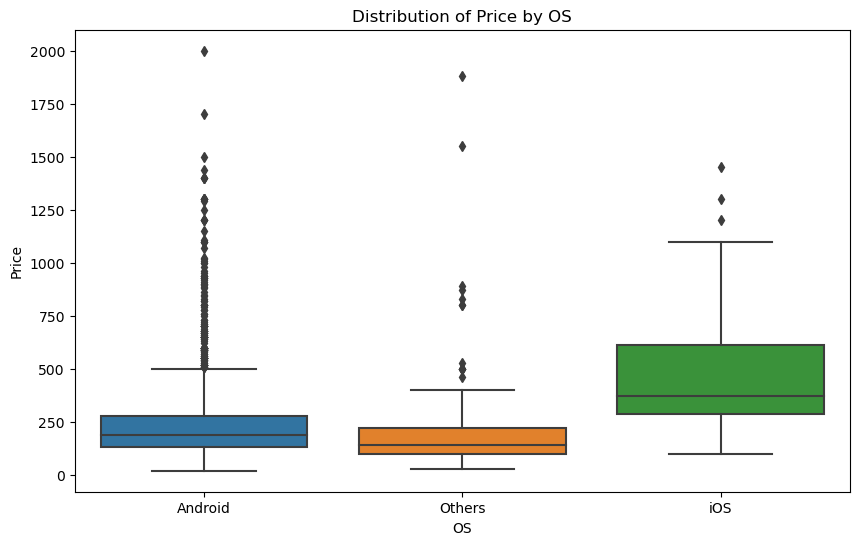

In [59]:
plot_feature_distribution(data, 'Price')

In [60]:
quantiles = [0, 0.25, 0.5, 0.75, 1]

bins = data['Price'].quantile(quantiles)

bins[0] = data['Price'].min()
bins[-1] = data['Price'].max()

labels = ['Very Low', 'Low', 'Medium', 'High']

data['Price Cat'] = pd.cut(data['Price'], bins=bins, labels=labels, include_lowest=True, duplicates='drop')

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

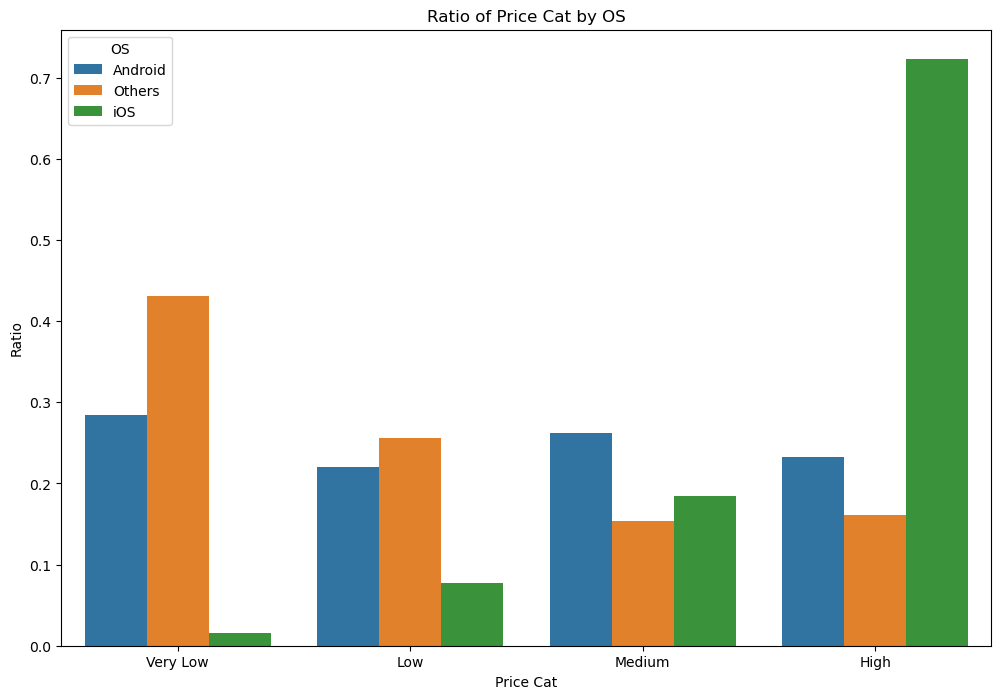

In [61]:
calculate_and_plot_ratio(data, ['OS', 'Price Cat'], 'Price Cat')

It would be best to keep this column as iOS tends to be more expensive

#### CPU

In [62]:
len(data[data['CPU'].isna() & data['Chipset'].isna()])

86

In [63]:
data.groupby('OS')['CPU'].value_counts()

OS       CPU 
Android  8.0     1207
         4.0      715
         2.0      289
         6.0       15
         10.0       3
Others   2.0       26
         4.0       25
         8.0       25
iOS      6.0       32
         2.0       21
         4.0        4
         8.0        4
         3.0        1
Name: count, dtype: int64

#### Colors

In [64]:
data.groupby('OS')['Colors'].value_counts()

OS       Colors                                                                                                                                 
Android  Black                                                                                                                                      265
         Black, White                                                                                                                               190
         White, Black                                                                                                                                47
         Black, Blue                                                                                                                                 26
         White                                                                                                                                       22
         Black, Gold                                                                           

In [65]:
data = data.drop(columns='Colors')

#### Loudspeaker

In [66]:
data.groupby('OS')['Loudspeaker'].value_counts()

OS       Loudspeaker
Android  True           1867
         False           577
Others   True            113
         False            24
iOS      False            49
         True             16
Name: count, dtype: int64

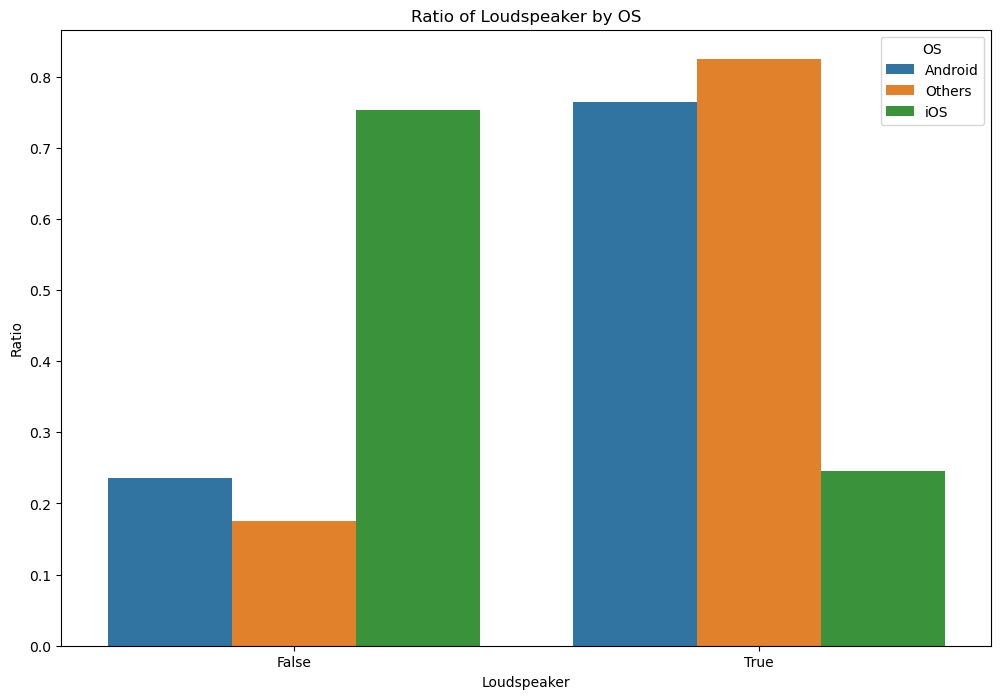

In [67]:
calculate_and_plot_ratio(data, ['OS', 'Loudspeaker'], 'Loudspeaker')

In [68]:
data = data.drop(columns='Loudspeaker')

#### 3.5mm jack

In [69]:
data.groupby('OS')['3.5mm jack'].value_counts()

OS       3.5mm jack
Android  True          2188
         False          256
Others   True           118
         False           19
iOS      False           33
         True            32
Name: count, dtype: int64

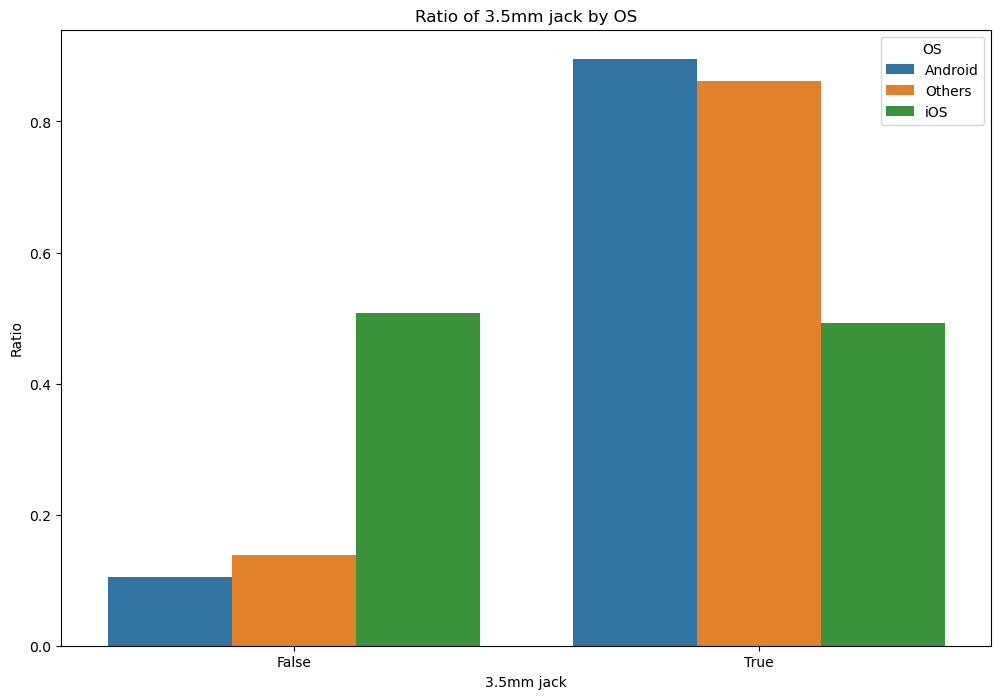

In [70]:
calculate_and_plot_ratio(data, ['OS', '3.5mm jack'], '3.5mm jack')

In [71]:
data = data.drop(columns='3.5mm jack')

#### WLAN

In [72]:
def split_and_count(s):
    if isinstance(s, str):
        return len(s.split(','))
    else:
        return 0

data['WLAN_COUNT'] = data['WLAN'].apply(split_and_count)

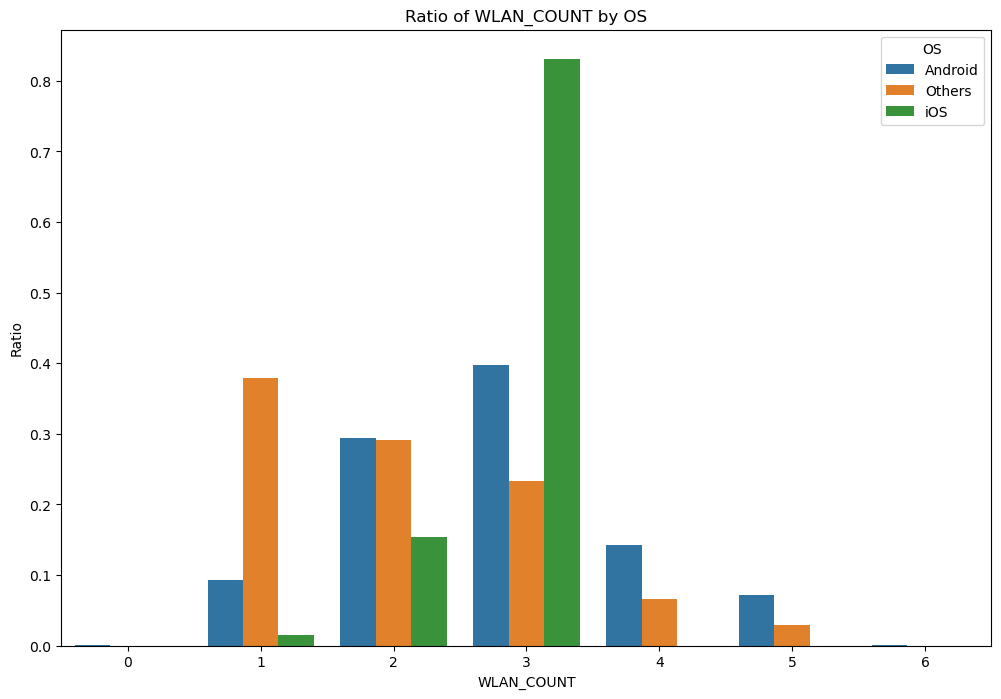

In [73]:
calculate_and_plot_ratio(data, ['OS', 'WLAN_COUNT'], 'WLAN_COUNT')

In [74]:
data = data.drop(columns='WLAN')

#### Sensors

In [75]:
data['Sensors Count'] = data['Sensors'].apply(split_and_count)

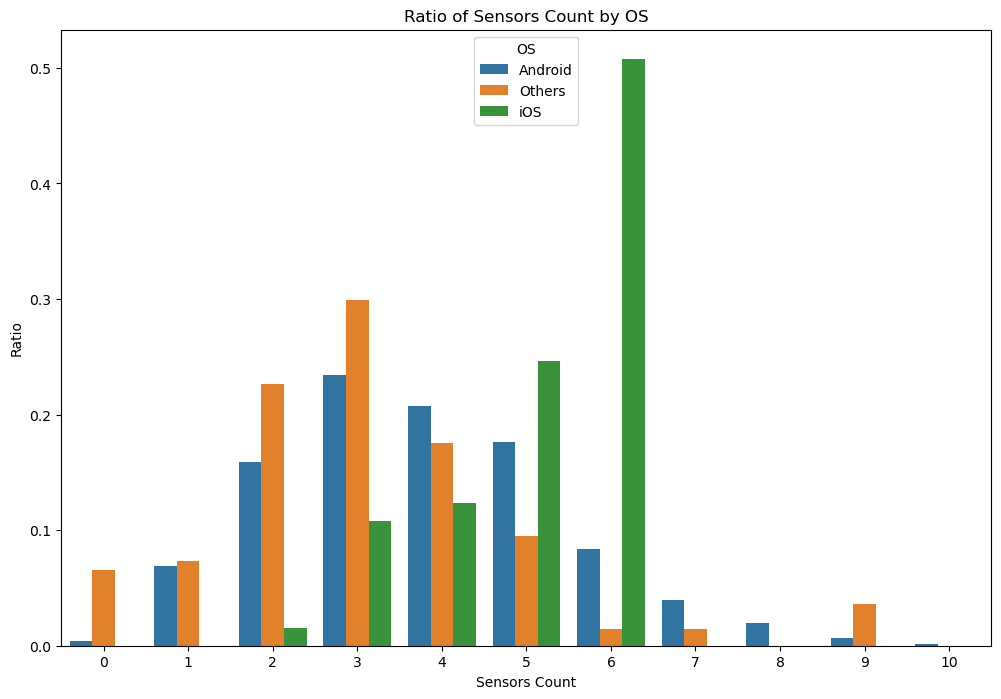

In [76]:
calculate_and_plot_ratio(data, ['OS', 'Sensors Count'], 'Sensors Count')

In [77]:
data = data.drop(columns=['Sensors', 'Sensors Count'])

In [78]:
data.isnull().sum()

brand                     0
4G                        0
5G                        0
Announced                 0
Status                    0
Weight                    0
Diameter                  0
SIM                       0
Display Type              0
Display Size              0
ppi                       0
body ratio                0
OS                        0
battery_capacity          0
Price                     0
CPU                     279
ratio                     0
pixel                     0
Bluetooth                 0
GPU                     224
Chipset                 257
Network                   0
Internal                  0
Card slot                 0
RAM                       0
Storage                   0
Ratio                     0
Weight Cat                0
Diameter Cat              0
Display Size Cat          0
ppi Cat                   0
body ratio Cat            0
battery_capacity Cat      0
Price Cat                 0
WLAN_COUNT                0
dtype: int64

#### ratio

In [79]:
data.groupby('OS')['ratio'].value_counts()

OS       ratio
Android  16:9     946
         20:9     440
         5:3      259
         5:9      215
         16:10    178
         18:9     157
         3:2       84
         19:9      69
         4:3       50
         21:9      20
         7:9       16
         3:9        8
         17:9       2
Others   5:3       48
         16:9      42
         4:3       17
         20:9      12
         5:9        7
         3:2        5
         16:10      4
         21:9       2
iOS      4:3       25
         5:9       23
         16:9      14
         3:2        3
Name: count, dtype: int64

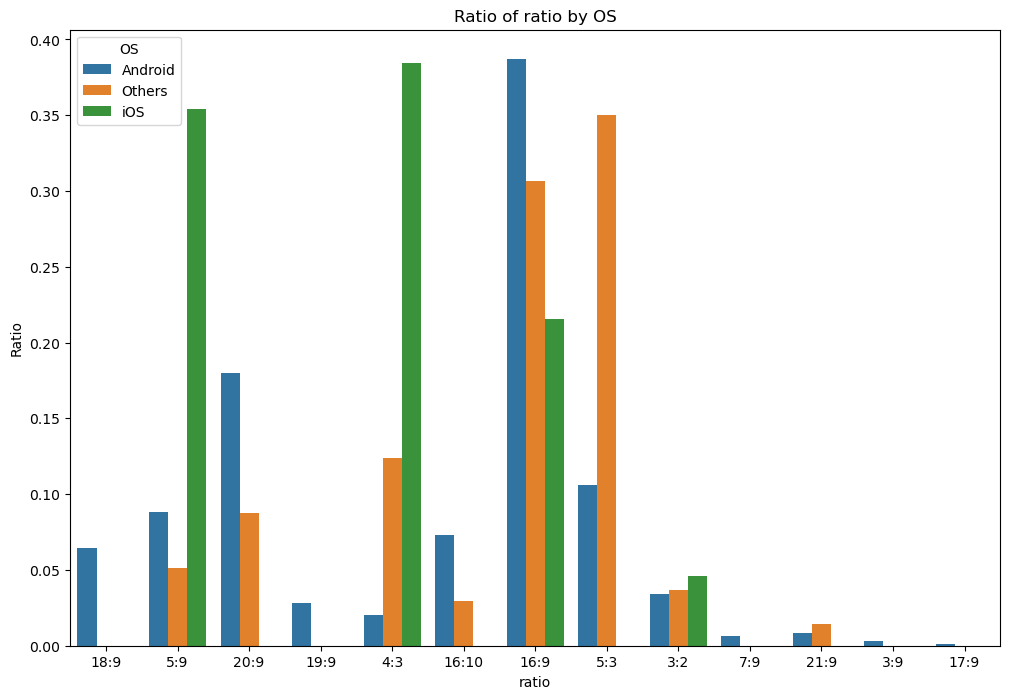

In [80]:
calculate_and_plot_ratio(data, ['OS', 'ratio'], 'ratio')

#### pixel

In [81]:
data.groupby('OS')['pixel'].value_counts()

OS       pixel    
Android  921600.0     356
         2073600.0    269
         384000.0     235
         2592000.0    229
         2527200.0    132
         1152000.0    123
         518400.0     120
         409920.0      96
         153600.0      84
         1024000.0     80
         1036800.0     79
         3686400.0     63
         2304000.0     53
         2332800.0     48
         1094400.0     46
         1123200.0     38
         4096000.0     37
         614400.0      34
         76800.0       32
         2600640.0     27
         4608000.0     24
         460800.0      21
         2462400.0     16
         2400000.0     15
         1160640.0     13
         4492800.0     12
         2721600.0     12
         3308640.0     11
         2767680.0     10
         1065600.0     10
         786432.0       9
         2425680.0      9
         4147200.0      9
         3145728.0      8
         4262400.0      7
         2397600.0      7
         6312960.0      7
         4377600.0 

In [82]:
data['pixel'].describe()

count    2.646000e+03
mean     1.577013e+06
std      1.180902e+06
min      7.680000e+04
25%      5.184000e+05
50%      1.094400e+06
75%      2.527200e+06
max      8.294400e+06
Name: pixel, dtype: float64

In [83]:
bins = [0, 518400, 1094400, 2527200, 8294400]
labels = ['Low', 'Medium', 'High', 'Very High']

data['pixel Cat'] = pd.cut(data['pixel'], bins=bins, labels=labels, include_lowest=True)

C:\Users\JAHAN\AppData\Local\Temp\ipykernel_24484\2580564718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\JAHAN\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

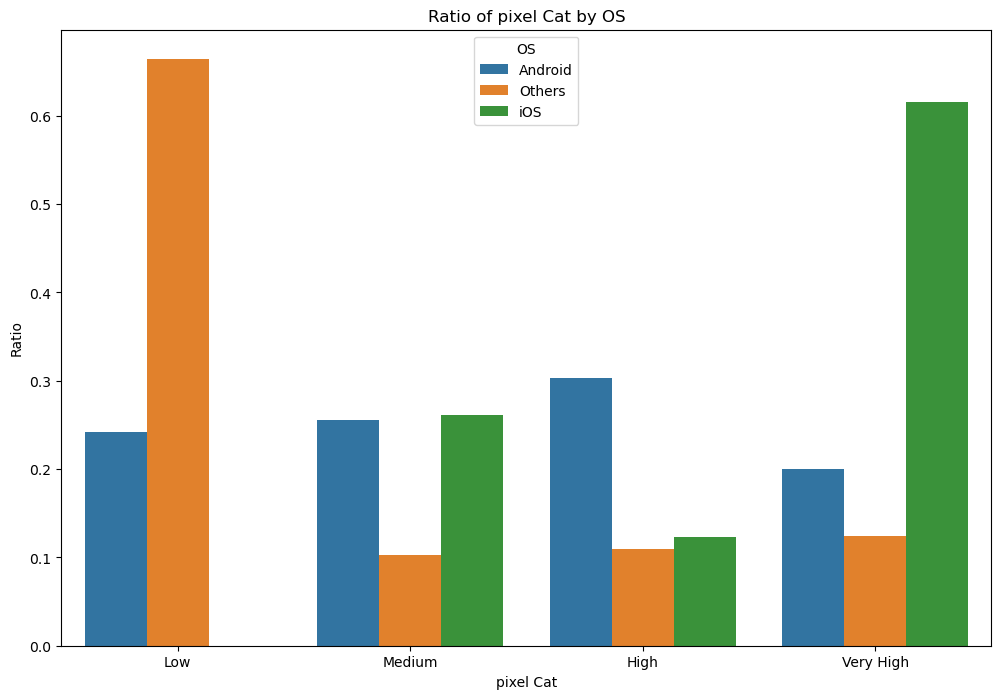

In [84]:
calculate_and_plot_ratio(data, ['OS', 'pixel Cat'], 'pixel Cat')

#### Bluetooth

In [85]:
data['Bluetooth'].unique()

array(['5.0, A2DP', '4.2, A2DP', '4.2, A2DP, LE', '5.0, A2DP, LE',
       '4.1, A2DP, LE', '4.0, A2DP, LE', '4.0, A2DP', '4.1, A2DP', '3.0',
       '3.0, A2DP', '2.1', 'Yes', '5.3, A2DP, LE', '5.3, A2DP, LE, EDR',
       '4.2, A2DP, EDR, LE', '5.0, A2DP, LE, EDR', '5.0, A2DP, EDR',
       '4.2, A2DP, EDR', '4.0, A2DP, EDR', '2.1, A2DP, EDR', '2.1, A2DP',
       '5.3, A2DP, LE, aptX HD, aptX Adaptive, aptX Lossless',
       '5.2, A2DP, LE, aptX HD, aptX Adaptive, aptX Lossless',
       '5.2, A2DP, LE, aptX HD, aptX Adaptive',
       '5.0, A2DP, LE, aptX Adaptive',
       '5.1, A2DP, LE, aptX HD, aptX Adaptive', '5.0, A2DP, LE, aptX HD',
       'v5.0, A2DP, LE', '4.1 or 4.2 (SDM630 only), A2DP, LE',
       '5.0, A2DP, EDR, LE, aptX', '5.0, A2DP, EDR, LE',
       '4.1, A2DP, EDR, LE', '4.2, A2DP, LE, aptX',
       '4.1, A2DP, LE, EDR, aptX', '4.1, A2DP, LE, aptX',
       '4.1, A2DP, aptX', '4.1, A2DP, EDR', '4.0, A2DP, LE, aptX',
       '3.0, A2DP, EDR', '5.2, A2DP, LE', '5.1, A2DP, LE', 

In [86]:
data.groupby('OS')['Bluetooth'].value_counts()

OS       Bluetooth                                                  
Android  4.0, A2DP                                                      391
         5.0, A2DP, LE                                                  313
         4.2, A2DP, LE                                                  225
         3.0, A2DP                                                      131
         4.1, A2DP, LE                                                  122
         5.1, A2DP, LE                                                  101
         4.0, A2DP, aptX                                                 81
         4.0, A2DP, LE                                                   72
         4.1, A2DP                                                       68
         2.1, A2DP, EDR                                                  60
         5.2, A2DP, LE                                                   56
         4.2, A2DP                                                       47
         Yes       

In [87]:
data = data.drop(columns='Bluetooth')

#### Network

In [88]:
data = data.drop(columns='Network')

#### Internal

In [89]:
data.groupby('OS')['Internal'].value_counts()

OS       Internal                                                                                                                       
Android  16GB 2GB RAM                                                                                                                       169
         8GB 1GB RAM                                                                                                                        168
         4GB 512MB RAM                                                                                                                      109
         32GB 3GB RAM                                                                                                                       107
         4GB 1GB RAM                                                                                                                         93
         16GB 1GB RAM                                                                                                                        86

In [90]:
data = data.drop(columns='Internal')

Internal exists in Storage and RAM

#### Card slot

In [91]:
data.groupby('OS')['Card slot'].value_counts()

OS       Card slot                                                                                           
Android  microSDXC (dedicated slot)                                                                              849
         microSDHC (dedicated slot)                                                                              550
         microSDXC (uses shared SIM slot)                                                                        345
         No                                                                                                      334
         microSDXC                                                                                               172
         microSDXC (uses shared SIM slot) - dual SIM model only                                                   37
         microSDHC (dedicated slot), 2 GB included                                                                33
         NM (Nano Memory), up to 256GB (uses shared SIM slot)          

In [92]:
data['Card slot'].unique()

array(['microSDXC (dedicated slot)', 'microSDXC (uses shared SIM slot)',
       'microSDHC (dedicated slot)', 'microSDXC (only single sim model)',
       'microSDXC', 'microSDHC',
       'microSDXC (dedicated slot) - single-SIM model', 'No',
       'microSDHC (dedicated slot), 2 GB included',
       'microSDHC (uses shared SIM slot)', 'Unspecified',
       'microSDXC (uses shared SIM slot) - dual SIM model only',
       'microSDXC (dedicated slot) - single-SIM modelmicroSDXC (uses shared SIM slot) - dual-SIM model',
       'microSDHC (dedicated slot), 16 GB included',
       'microSDHC (dedicated slot), 8 GB included',
       'microSDHC (dedicated slot), 32 GB included',
       'microSDHC (dedicated slot), 4 GB included',
       'NM (Nano Memory), up to 256GB (uses shared SIM slot)', 'microSD',
       'NM (Nano Memory), up to 256GB (dedicated slot)',
       'microSDXC (dedicated slot) - single-SIM modelNo microSDXC - dual-SIM model',
       'Yes, up to 64 GB (dedicated slot)',
       '

In [93]:
data = data.drop(columns='Card slot')

iOS has only 'No' as a value for Card Slot, but it exists in the other two as well

#### RAM

In [94]:
data.groupby('OS')['RAM'].value_counts()

OS       RAM      
Android  1.000000     502
         2.000000     476
         4.000000     341
         3.000000     306
         6.000000     226
         0.500000     219
         8.000000     168
         1.500000      70
         12.000000     38
         0.250000      37
         0.750000      36
         0.375000      11
         16.000000      3
         0.271484       2
         0.263672       2
         0.152344       1
         0.625000       1
         0.562500       1
         0.466797       1
         0.283203       1
         0.273438       1
         0.136719       1
Others   0.500000      37
         1.000000      26
         0.250000      18
         8.000000      15
         0.125000       8
         0.562500       7
         2.000000       6
         0.062500       5
         4.000000       4
         6.000000       4
         0.375000       2
         12.000000      2
         0.437500       1
         3.000000       1
         16.000000      1
iOS      4.000000  

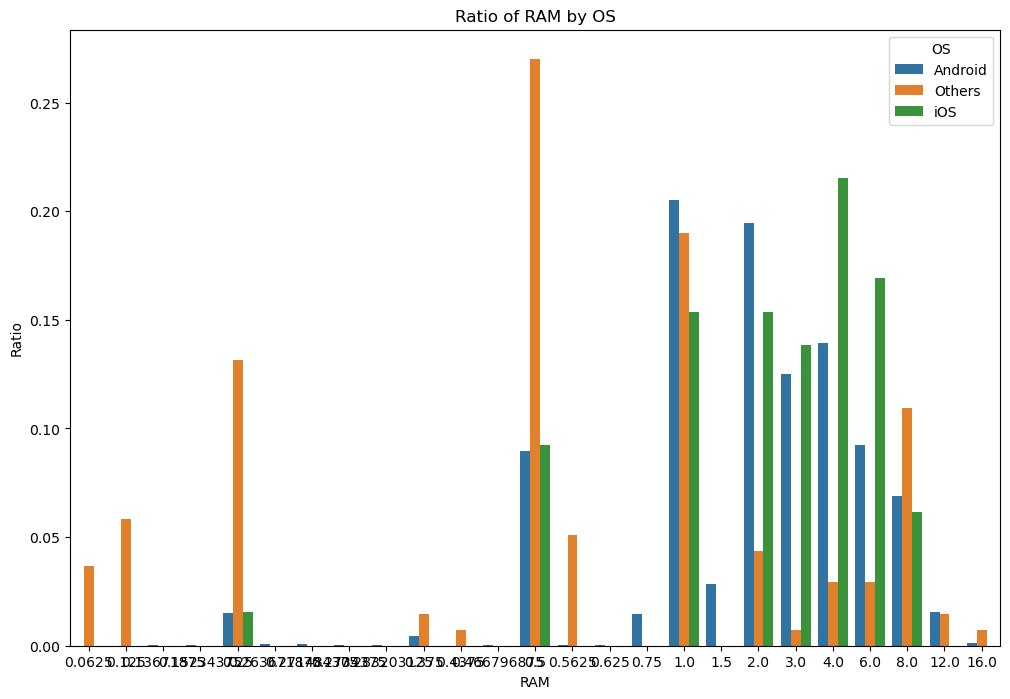

In [95]:
calculate_and_plot_ratio(data, ['OS', 'RAM'], 'RAM')

In [96]:
data['RAM'] = data['RAM'].apply(lambda x: np.ceil(x))

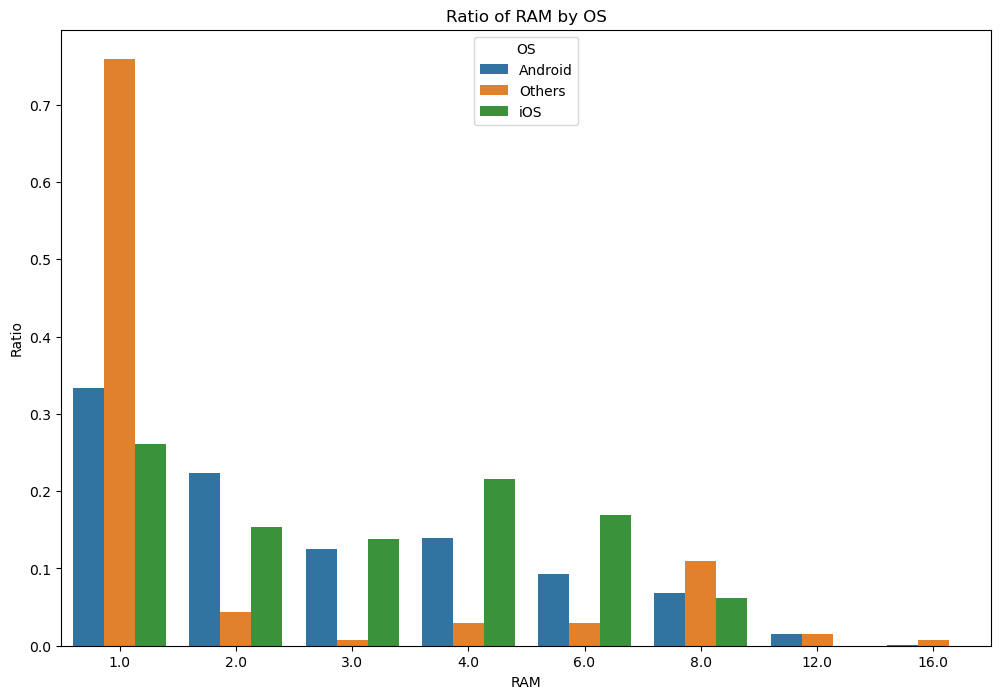

In [97]:
calculate_and_plot_ratio(data, ['OS', 'RAM'], 'RAM')

#### Storage

In [98]:
data.groupby('OS')['Storage'].value_counts()

OS       Storage   
Android  16.000000     543
         32.000000     432
         64.000000     358
         128.000000    323
         8.000000      297
         4.000000      278
         256.000000     82
         0.500000       54
         2.000000       17
         1.000000       16
         0.250000        8
         512.000000      5
         0.146484        4
         3.000000        3
         1.100000        3
         0.156250        3
         0.375000        2
         0.154297        2
         11.000000       2
         1.500000        2
         2.900000        2
         0.135742        1
         0.136719        1
         0.166016        1
         0.175781        1
         0.253906        1
         0.263672        1
         0.562500        1
         13.200000       1
Others   8.000000       43
         16.000000      23
         4.000000       17
         128.000000     16
         32.000000       8
         256.000000      4
         64.000000       4
        

In [99]:
data['Storage'] = data['Storage'].apply(lambda x: np.ceil(x))

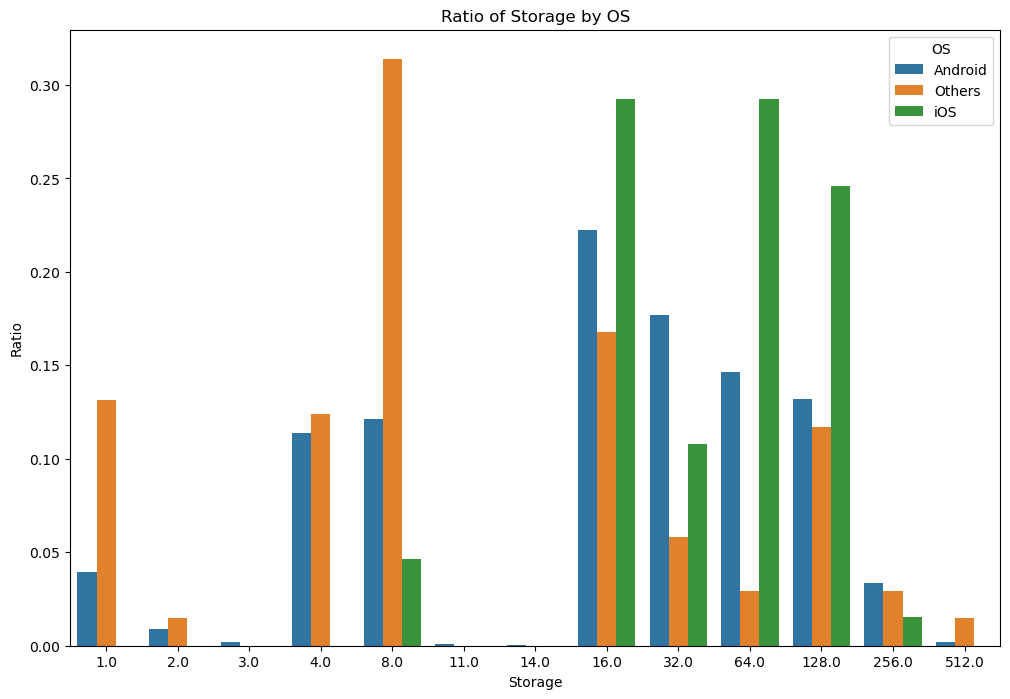

In [100]:
calculate_and_plot_ratio(data, ['OS', 'Storage'], 'Storage')

In [101]:
data = data.drop(columns='Ratio')

Handling Missing Values of CPU, GPU and Chipset will be done in another notebook :)

In [102]:
data.columns

Index(['brand', '4G', '5G', 'Announced', 'Status', 'Weight', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'OS',
       'battery_capacity', 'Price', 'CPU', 'ratio', 'pixel', 'GPU', 'Chipset',
       'RAM', 'Storage', 'Weight Cat', 'Diameter Cat', 'Display Size Cat',
       'ppi Cat', 'body ratio Cat', 'battery_capacity Cat', 'Price Cat',
       'WLAN_COUNT', 'pixel Cat'],
      dtype='object')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 0 to 2650
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand                 2646 non-null   object  
 1   4G                    2646 non-null   bool    
 2   5G                    2646 non-null   bool    
 3   Announced             2646 non-null   float64 
 4   Status                2646 non-null   object  
 5   Weight                2646 non-null   float64 
 6   Diameter              2646 non-null   float64 
 7   SIM                   2646 non-null   object  
 8   Display Type          2646 non-null   object  
 9   Display Size          2646 non-null   float64 
 10  ppi                   2646 non-null   float64 
 11  body ratio            2646 non-null   float64 
 12  OS                    2646 non-null   object  
 13  battery_capacity      2646 non-null   float64 
 14  Price                 2646 non-null   float64 
 15  CPU      

In [104]:
data.to_csv('processed_data.csv', index=False)

| DELETED COLUMNS  |
|------------------|
| NAME             |
| 2G               |
| 3G               |
| LENGTH           |
| WIDTH            |
| WLAN             |
| COLORS           |
| SENSORS          |
| BLUETOOTH        |
| LOUDSPEAKER      |
| 3.5MM JACK       |
| INTERNAL         |
| CARDSLOT         |
| NETWORK          |

TOTAL COUNT: 14

| MODIFIED COLUMNS     |
|----------------------|
| WEIGHT CAT           |
| DIAMETER CAT         |
| DISPLAY TYPE         |
| DISPLAY SIZE CAT     |
| PPI CAT              |
| BODY RATIO CAT       |
| BATTERY_CAPACITY CAT |
| PRICE CAT            |
| WLAN_COUNT           |
| PIXEL CAT            |

TOTAL COUNT: 10

### Handling Missing Values

#### CPU


In [105]:
data['CPU'].isnull().sum()

279

In [106]:
cpu_counts = data.groupby(['OS', 'brand', 'CPU']).size().reset_index(name='COUNT')
max_cpu = cpu_counts.loc[cpu_counts.groupby(['OS', 'brand'])['COUNT'].idxmax()]
max_cpu.drop(columns='COUNT', inplace=True)
max_cpu

,OS,brand,CPU
1,Android,alcatel,4.0
4,Android,asus,4.0
8,Android,blu,4.0
12,Android,htc,8.0
16,Android,huawei,8.0
18,Android,infinix,8.0
22,Android,lenovo,8.0
25,Android,lg,4.0
30,Android,nokia,8.0
34,Android,samsung,8.0


In [107]:
for index, row in data.iterrows():
    if pd.isnull(row['CPU']):
        os_value = row['OS']
        brand_value = row['brand']
        
        matching_rows = max_cpu[(max_cpu['OS'] == os_value) & (max_cpu['brand'] == brand_value)]
        
        if not matching_rows.empty:
            corresponding_cpu = matching_rows.iloc[0]['CPU']
            data.at[index, 'CPU'] = corresponding_cpu
        else:
            print(os_value, brand_value)
            data.at[index, 'CPU'] = 4


data['CPU'].isnull().sum()

Others lg
Others lg


0

Null values in the 'CPU' column were filled by looking up corresponding values from the 'brand' and 'OS' columns. Additionally, special conditions were applied to fill the 'CPU' value with 4 for rows where the 'OS' is 'Others' and the 'brand' is 'lg'. 

The final dataset was updated with the filled 'CPU' values.

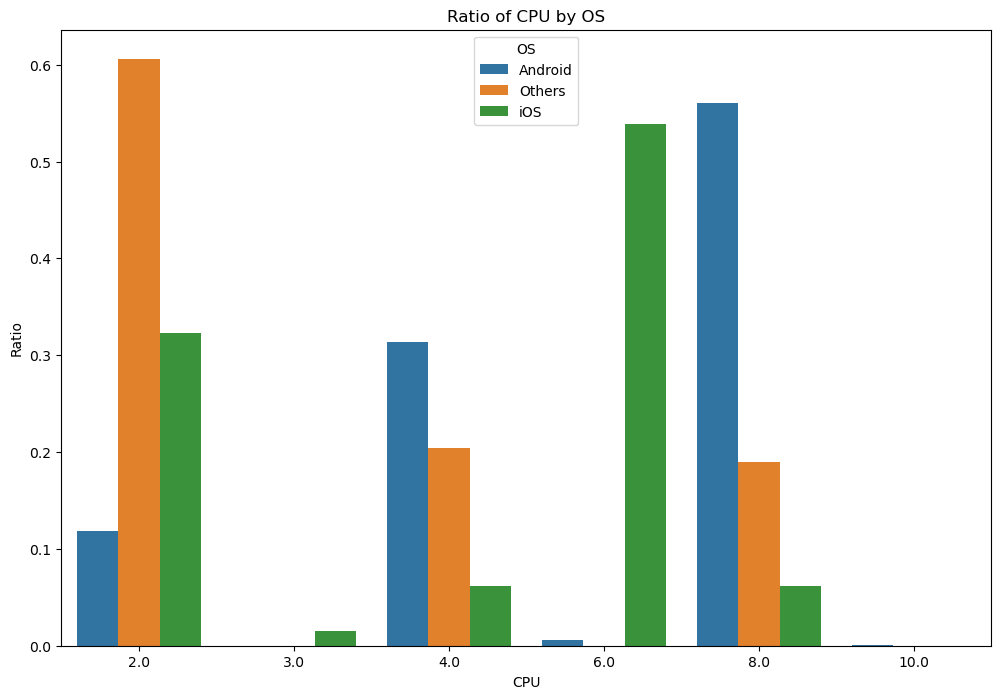

In [108]:
calculate_and_plot_ratio(data, ['OS', 'CPU'], 'CPU')

#### GPU

In [109]:
data['GPU'].isnull().sum()

224

In [110]:
announced_counts = data['Announced'].value_counts()

max_announced_values = data.groupby('Announced')['GPU'].apply(lambda x: x.value_counts().idxmax())

for year, gpu in max_announced_values.items():
    data.loc[(data['Announced'] == year) & (data['GPU'].isnull()), 'GPU'] = gpu
    
data['GPU'].isnull().sum()

0

In [111]:
data['GPU'].nunique()

234

In [112]:
def preprocess_gpu(gpu):
    if '-' in gpu:
        return gpu.split('-')[0].strip()
    else:
        return gpu.split()[0].strip()

data['GPU'] = data['GPU'].apply(preprocess_gpu)
data['GPU'].nunique()

49

In [113]:
data['GPU'].value_counts()

GPU
Adreno                             1415
Mali                                730
PowerVR                             315
IMG8322                              32
ULP                                  22
Apple GPU (4                         17
Broadcom                             14
Vivante                              12
Apple GPU (5                          8
Intel                                 6
Xclipse 920                           4
PowerVR Series7XT Plus (six           4
No                                    4
PowerVR Series 7 (12                  4
PowerVR GT7600 (six                   4
PowerVR G6430 (quad                   4
Adreno 306Mali                        3
Adreno 306                            3
PowerVR GX6450 (quad                  3
Apple GPU (three                      3
Adreno 405Mali                        2
Maleoon                               2
Apple GPU (6                          2
Apple GPU (8                          2
Immortalis                          

In [114]:
def categorize_gpu(gpu):
    if 'Adreno' in gpu:
        return 'Adreno'
    elif 'Mali' in gpu:
        return 'Mali'
    elif 'PowerVR' in gpu:
        return 'PowerVR'
    elif 'Apple GPU' in gpu:
        return 'Apple GPU'
    elif 'Broadcom' in gpu:
        return 'Broadcom'
    else:
        return 'Others'
    
data['GPU'] = data['GPU'].apply(categorize_gpu)

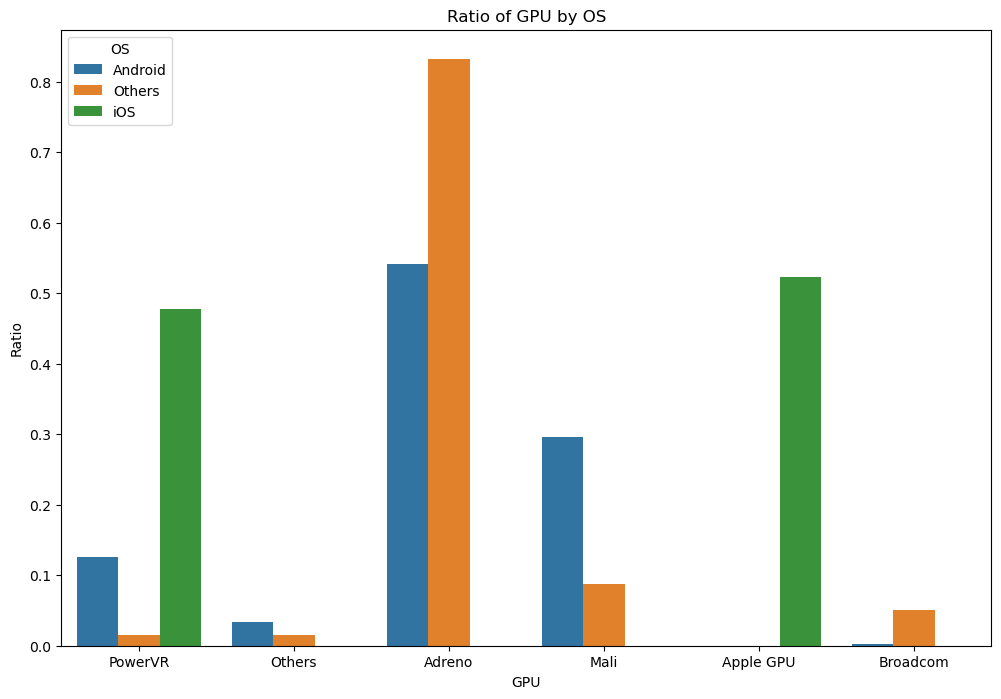

In [115]:
calculate_and_plot_ratio(data, ['OS', 'GPU'], 'GPU')

#### Chipset

In [116]:
announced_counts = data['Announced'].value_counts()

max_announced_chipset = data.groupby('Announced')['Chipset'].apply(lambda x: x.value_counts().idxmax())

for year, Chipset in max_announced_chipset.items():
    data.loc[(data['Announced'] == year) & (data['Chipset'].isnull()), 'Chipset'] = Chipset 

In [117]:
data['Chipset'].nunique()

544

In [118]:
data['Chipset'] = data['Chipset'].apply(lambda x: x.split()[0])

In [119]:
data['Chipset'].value_counts()

Chipset
Qualcomm       1455
Mediatek        621
Exynos          169
Kirin           121
Apple            65
Unisoc           59
Intel            36
Spreadtrum       24
TI               22
Nvidia           22
Hummingbird      11
NovaThor         10
Huawei            9
Broadcom          4
Marvell           4
MediaTek          3
BCM               2
NVIDIA            1
Intel®            1
QM215             1
LG                1
Xiaomi            1
Leadcore          1
5                 1
SC6815A           1
Pega-Dual         1
Name: count, dtype: int64

In [120]:
def categorize_chipset(chipset):
    if 'Qualcomm' in chipset:
        return 'Qualcomm'
    elif 'Mediatek' in chipset:
        return 'Mediatek'
    elif 'Exynos' in chipset:
        return 'Exynos'
    elif 'Kirin' in chipset:
        return 'Kirin'
    elif 'Apple' in chipset:
        return 'Apple'
    elif 'Unisoc' in chipset:
        return 'Unisoc'
    elif 'Intel' in chipset:
        return 'Intel'
    elif 'Nvidia' in chipset:
        return 'Nvidia'
    else:
        return 'Others'
    
data['Chipset'] = data['Chipset'].apply(categorize_chipset)

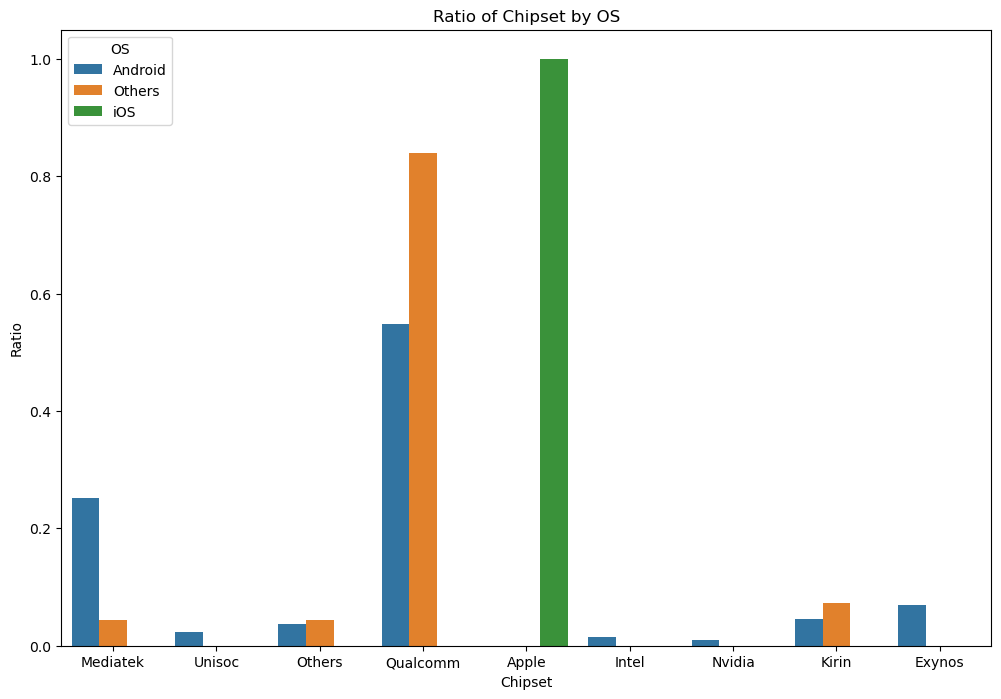

In [121]:
calculate_and_plot_ratio(data, ['OS', 'Chipset'], 'Chipset')

### Handling Categorical Variables:

In [122]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['brand', 'ratio','OS' ,'GPU', 'Chipset', 'Weight Cat', 'Diameter Cat', 'Display Size Cat',
                     'ppi Cat', 'body ratio Cat', 'battery_capacity Cat', 'Price Cat', 'pixel Cat', 'Status']


for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [123]:
columns_to_dummies = ['SIM', 'Display Type']
df = pd.get_dummies(data, columns=columns_to_dummies)

In [124]:
df = df.drop(columns='Ratio')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2646 entries, 0 to 2650
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 2646 non-null   int32  
 1   4G                    2646 non-null   bool   
 2   5G                    2646 non-null   bool   
 3   Announced             2646 non-null   float64
 4   Status                2646 non-null   int32  
 5   Weight                2646 non-null   float64
 6   Diameter              2646 non-null   float64
 7   Display Size          2646 non-null   float64
 8   ppi                   2646 non-null   float64
 9   body ratio            2646 non-null   float64
 10  OS                    2646 non-null   int32  
 11  battery_capacity      2646 non-null   float64
 12  Price                 2646 non-null   float64
 13  CPU                   2646 non-null   float64
 14  ratio                 2646 non-null   int32  
 15  pixel                 2646

In [126]:
df.head()

,brand,4G,5G,Announced,Status,Weight,Diameter,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,GPU,Chipset,RAM,Storage,Weight Cat,Diameter Cat,Display Size Cat,ppi Cat,body ratio Cat,battery_capacity Cat,Price Cat,WLAN_COUNT,pixel Cat,SIM_Micro-SIM,SIM_Mini-SIM,SIM_Nano-SIM,SIM_eSIM,Display Type_AMOLED,Display Type_LCD,Display Type_OLED,Display Type_Others,Display Type_Retina,Display Type_TFT
0,0,True,False,2022.0,0,172.0,10.0,5.50,293.0,74.0,0,3000.0,100.0,4.0,3,1036800.0,5,4,2.0,32.0,2,3,3,2,0,2,3,2,2,False,False,True,False,False,True,False,False,False,False
1,0,True,False,2021.0,0,190.0,9.7,6.10,282.0,78.1,0,3000.0,110.0,8.0,11,1123200.0,4,8,2.0,32.0,2,0,4,2,0,2,3,2,0,False,False,True,False,False,True,False,False,False,False
2,0,True,False,2021.0,0,134.0,9.8,5.00,215.0,71.4,0,2000.0,60.0,4.0,3,460800.0,5,4,1.0,8.0,3,0,3,1,2,1,3,2,1,False,False,True,False,False,True,False,False,False,False
3,0,True,False,2021.0,0,194.0,8.7,6.52,269.0,82.0,0,4000.0,330.0,8.0,5,1152000.0,5,4,4.0,64.0,2,1,4,2,0,2,0,2,0,False,False,True,False,False,True,False,False,False,False
4,0,True,False,2021.0,0,190.0,8.8,6.52,269.0,82.0,0,4000.0,130.0,8.0,5,1152000.0,5,4,3.0,32.0,2,1,4,2,0,2,3,2,0,False,False,True,False,False,True,False,False,False,False


In [127]:
df.to_csv('final_data', index=False)

# FINAL RESULTS

| COLUMNS TO KEEP FOR 100% |
|--------------------------|
| BRAND                    |
| 5G                       |
| SIM                      |
| DISPLAY TYPE             |
| BATTERY CAPACITY         |
| CPU                      |
| GPU                      |
| CHIPSET                  |

TOTAL COUNT: 8

| COLUMNS TO KEEP FOR 50% |
|-------------------------|
| ANNOUNCED               |
| WEIGHT CAT              |
| DIAMETER CAT            |
| DISPLAY SIZE CAT        |
| PPI CAT                 |
| BODY RATIO CAT          |
| PRICE CAT               |
| WLAN_COUNT              |
| RATIO                   |
| PIXEL CAT               |
| STORAGE                 |
| RAM                     |

TOTAL COUNT: 12

| COLUMNS TO KEEP FOR LESS THAN 50% |
|-----------------------------------|
| STATUS                            |

TOTAL COUNT: 1
